In [1]:
import numpy as np 
from numpy import linalg as LA
%run "plotting_functions.ipynb"

In [2]:
db = np.load('db3_5SS_balanced_s5021.npz')
print(db['cplrData'].shape)
cplr=db['cplrData']

(5021, 100, 3)


In [3]:
# Scale coupler path to 1/-1 bounding box
def normalizePath(Path):
    #SCALING
    S=np.max(np.abs(Path))
    Scale_Path=Path/S
    return Scale_Path

# Calculate the total arc length of a 3D curve
def calcArcLen(path):
    ArcLen=0
    for j in range(0,len(path)-1):
        d=LA.norm(path[j]-path[j+1])
        ArcLen+=d
    return ArcLen

In [4]:
new_cplr=[]
for i in range(len(cplr)):
    nPath=normalizePath(cplr[i])
    new_cplr.append(nPath)

In [5]:
arcL=[]
for i in range(len(cplr)):
    L=calcArcLen(new_cplr[i])
    arcL.append(L)

print(np.flipud(np.sort(arcL)))
print(np.flipud(np.argsort(arcL)))

[7.30132576 6.73814772 6.47910678 ... 1.94764138 1.88099262 1.79520459]
[1975 1732 1060 ... 2005 3146 3151]


C:\Users\sshel\Miniconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  


<IPython.core.display.Javascript object>


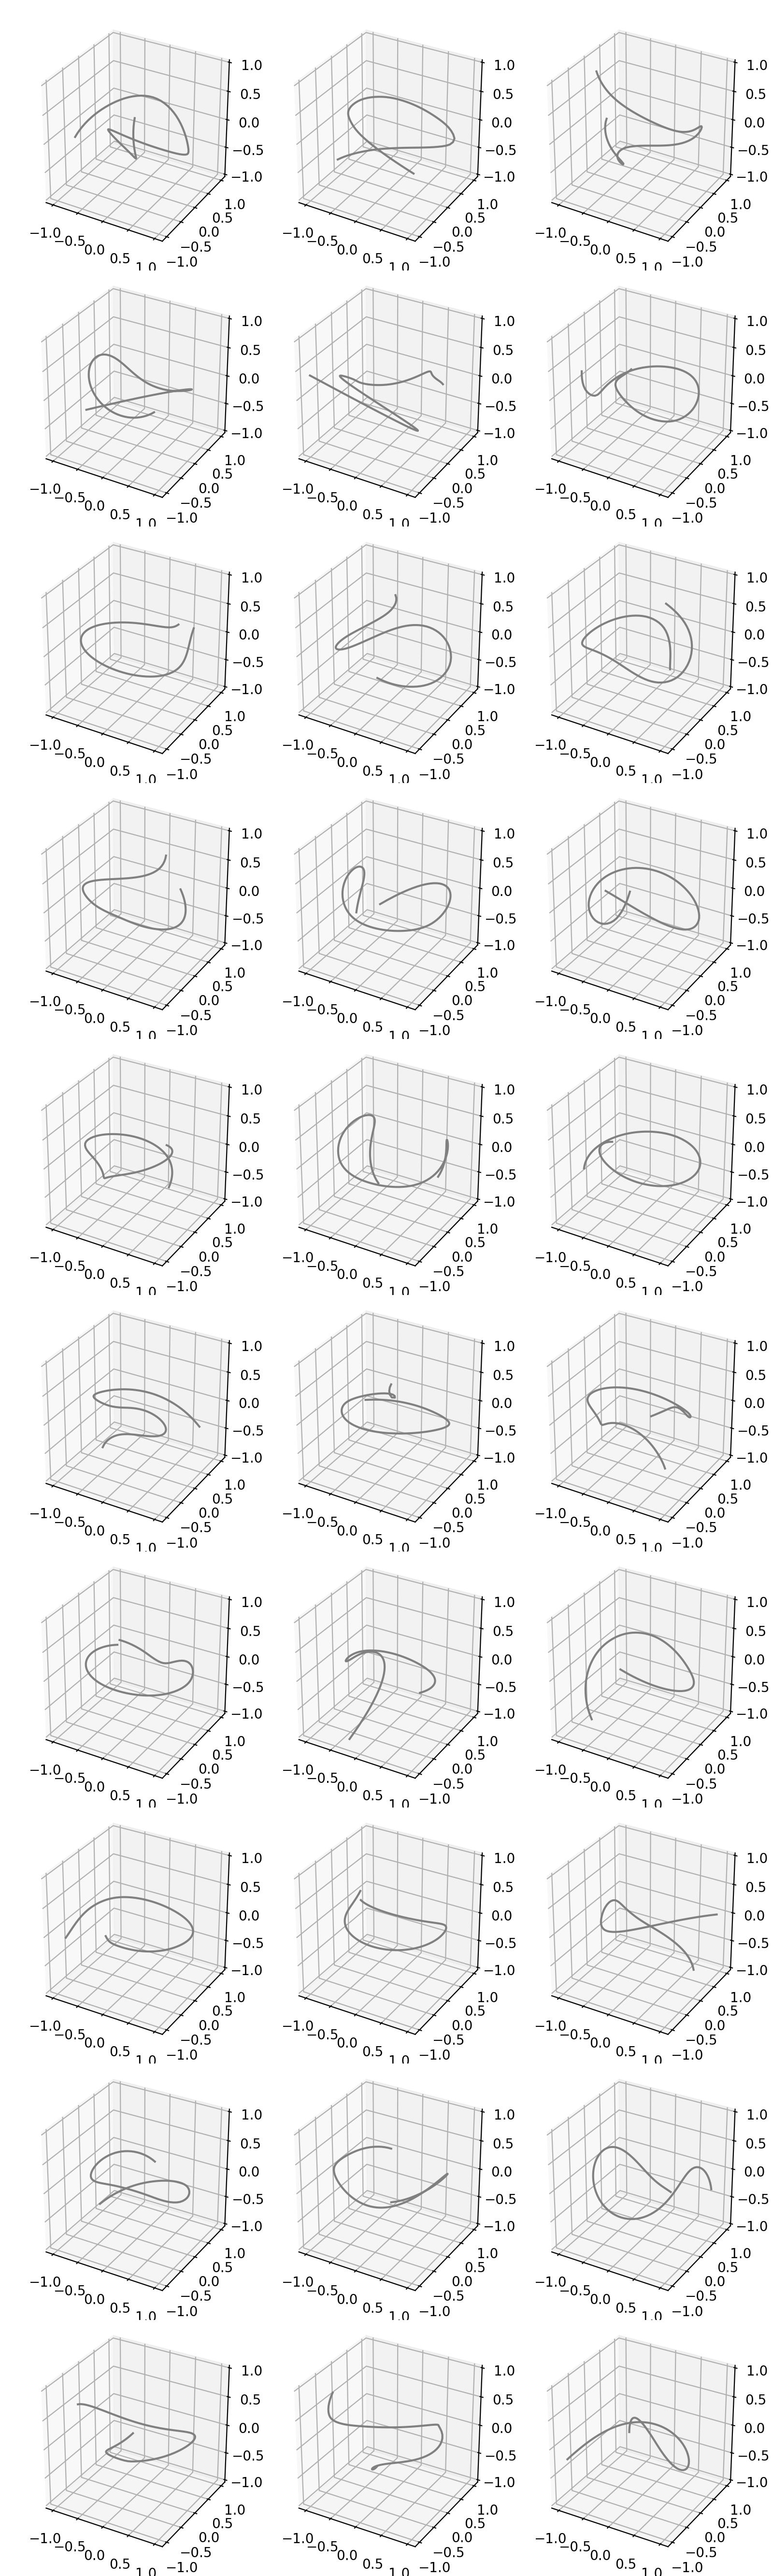

In [7]:
sortedIndex=np.flipud(np.argsort(arcL))
arc_cplr=np.array(new_cplr)[[sortedIndex]]
visualizePaths(arc_cplr,axlimit=1)